# Examples for Employing Schedulers as fastai Callbacks

In [1]:
import os

os.chdir('..')

In [2]:
from src.core import training

## Exponential Rate Decay

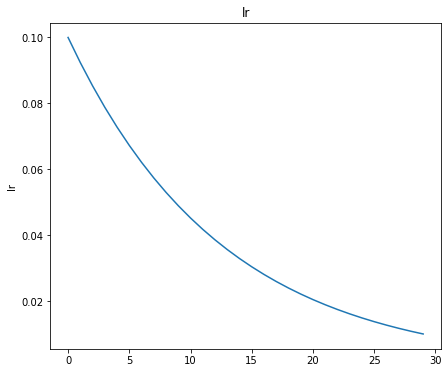

In [3]:
sh = training.get_exp_scheduler(lr_from=0.1, lr_to=0.01)
training.plot_scheduler(sh, epochs=30)

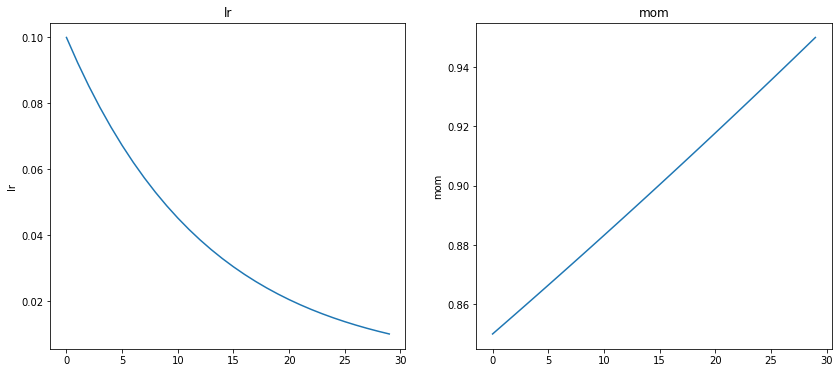

In [4]:
sh = training.get_exp_scheduler(lr_from=0.1, lr_to=0.01, mom_from=0.85, mom_to=0.95)
training.plot_scheduler(sh, epochs=30)

## Polynomial Rate Decay

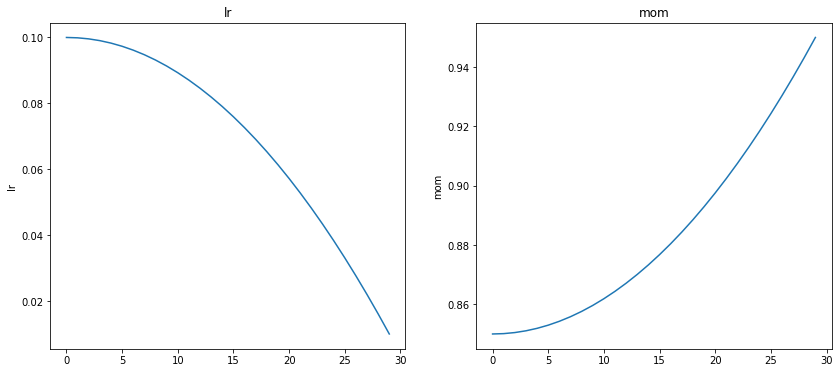

In [5]:
sh = training.get_poly_scheduler(lr_from=0.1, lr_to=0.01, mom_from=0.85, mom_to=0.95,
                                 power=2)
training.plot_scheduler(sh, epochs=30)

## Cosine Rate Decay

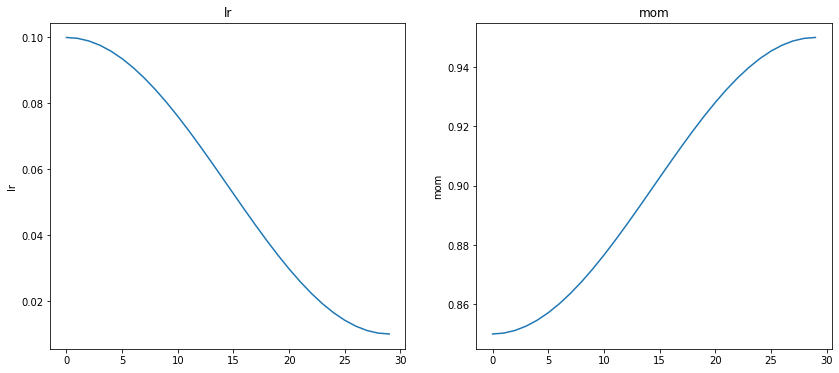

In [6]:
sh = training.get_cos_scheduler(lr_from=0.1, lr_to=0.01, mom_from=0.85, mom_to=0.95)
training.plot_scheduler(sh, epochs=30)

## Usage in fastai

Pass the scheduler as callback to ```Learner``` object or ```learner.fit``` method.

```python
sh = training.get_cos_scheduler(lr_from=0.1, lr_to=0.01, mom_from=0.85, mom_to=0.95)

learner = cnn_learner(
    dls=..., 
    model=...,
    loss_func=...,
    opt_func=...,
    cbs=[sh])
```

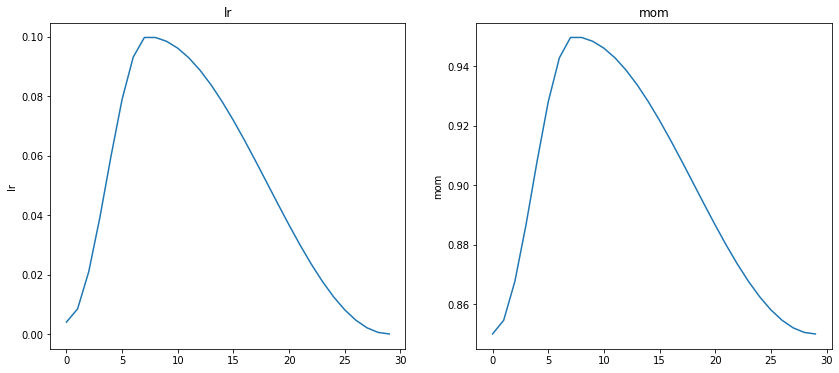

In [9]:
from fastai.vision.all import combined_cos, ParamScheduler


def get_1cycle_sheduler(lr_max=0.1, div=25.0, div_final=1e5, pct_start=0.25, mom_min=0.85, mom_max=0.95):
    scheds = {'lr': combined_cos(pct_start, lr_max/div, lr_max, lr_max/div_final),
              'mom': combined_cos(pct_start, *(mom_min, mom_max, mom_min))}
    sh = ParamScheduler(scheds)
    return sh


sh = get_1cycle_sheduler()
training.plot_scheduler(sh, epochs=30)